### Set directory and session info

In [1]:
date = '210415'
larvaID = 'Larva_1'
fov = 'FOV1'
badTrials = [21]
imgPath = '/Volumes/genie/Jihong_GENIE_stuff/NMJ_imaging/uf-GCaMP/' + date + '/' + larvaID + '/' + fov
# imgPath = '/Users/zhengj10/Desktop/ufGCaMP/'+ date + '/' + larvaID + '/' + fov
shutterCloseFrames = 0


### Import modules

In [2]:
import numpy as np
import os
import shutil
from registration import CrossCorr
from skimage.io import imsave
from glob import glob
import tifffile as tff
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'registration'

### Load data

In [3]:
imgFiles = glob(imgPath + '/TSeries' + '*.tif')
imgFiles = sorted(imgFiles)
# for imgFile in imgFiles:
#     print (imgFile)
print ('The number of trials is: ', len(imgFiles))
os.path.exists(imgPath)

The number of trials is:  45


True

### Registration

In [4]:
reference = tff.TiffFile(imgFiles[33])
reference = reference.asarray()
print (reference.shape)
# reference = reference[shutterCloseFrames:,20:115,10:60]
reference = reference[shutterCloseFrames:,:,:]
print (reference.shape)
reference = np.mean(reference, axis=0)
print (reference.shape)


(1800, 128, 128)
(1800, 128, 128)
(128, 128)


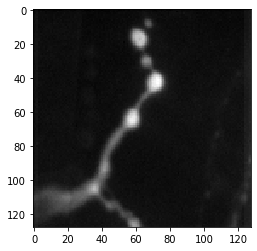

In [5]:
fig = plt.figure()
plt.imshow(reference, cmap = 'gray')
# fig.savefig('/Users/zhengj10/Desktop/jGCaMP7f_NMJ.png')
plt.show()


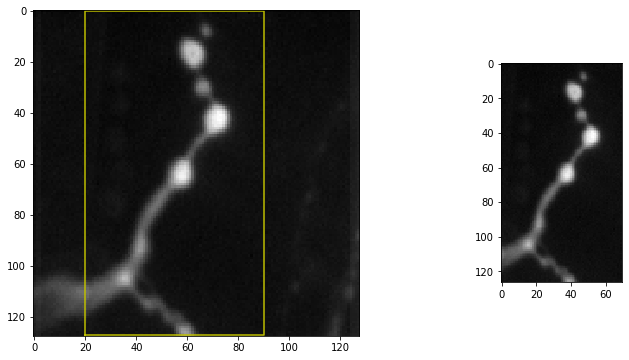

In [6]:
# xStart = 150
# xEnd = 400
# yStart = 200
# yEnd = 350

xStart = 0
xEnd = 127
yStart = 20
yEnd = 90

vmin = reference.min() 
vmax = reference.max()

from matplotlib import gridspec
fig = plt.figure(figsize=(12, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, (xEnd-xStart)/512.0])
ax0 = plt.subplot(gs[0])
ax0.imshow(reference, cmap = 'gray', vmin = vmin, vmax = vmax)
ax0.plot([yStart,yEnd,yEnd,yStart,yStart],[xEnd,xEnd,xStart,xStart,xEnd], 'y')
ax1 = plt.subplot(gs[1])
ax1.imshow(reference[xStart:xEnd, yStart:yEnd], cmap = 'gray', vmin = vmin, vmax = vmax)

# plt.tight_layout()



# plt.figure(figsize=(10,10))
# plt.imshow(reference, cmap = 'gray', vmin = vmin, vmax = vmax)
# plt.plot([yStart,yEnd,yEnd,yStart,yStart],[xEnd,xEnd,xStart,xStart,xEnd],'y')
# plt.figure(figsize=(10,10))
# plt.imshow(reference[xStart:xEnd, yStart:yEnd], cmap = 'gray', vmin = vmin, vmax = vmax)
plt.show()


In [7]:
trialProtoc = { 
                5: '001Hz',
               10: '005Hz',
               15: '010Hz',
               20: '020Hz',
               25: '040Hz',
               30: '080Hz',
               35: '160Hz',
               40: '240Hz',
               45: '320Hz'
              }

sumPath = os.path.join(imgPath, 'summary')
if not os.path.exists(sumPath):
    os.makedirs(sumPath)

algorithm = CrossCorr()

meanOfImg = []
# for trialNum in range(len(imgFiles)):
for trialNum in range(20,30):
    if trialNum+1 in badTrials:
        continue

    data = tff.TiffFile(imgFiles[trialNum])
    print ('currently registering ' + str(trialNum+1))
    data = data.asarray()
    data = data[shutterCloseFrames:, :, :]
    model = algorithm.fit(data[:, xStart:xEnd, yStart:yEnd], reference[xStart:xEnd, yStart:yEnd])
    registered = model.transform(data)
    registered = registered.toarray()
    print (os.path.splitext(os.path.basename(imgFiles[trialNum]))[0] + '.tif Registered')
    meanOfImg.append(registered)
    if (trialNum+1)%5 == 0:

        meanOfImg = np.mean(meanOfImg,axis=0)
        print (meanOfImg.shape)
        imsave(sumPath + '/meanOfImg_' + trialProtoc[trialNum+1] + '.tif', meanOfImg.astype('float32'), plugin='tifffile', photometric='minisblack')
#         imsave(sumPath + '/meanOfImg_160Hz.tif', meanOfImg.astype('float32'), plugin='tifffile', photometric='minisblack')
        meanOfImg = []
        print  (trialProtoc[trialNum+1] + ' trials average image saved')
print ('Trials averaging completed')


currently registering 16
TSeries-GCaMP456-210415-Cycle000016.tif Registered
currently registering 17
TSeries-GCaMP456-210415-Cycle000017.tif Registered
currently registering 18
TSeries-GCaMP456-210415-Cycle000018.tif Registered
currently registering 20
TSeries-GCaMP456-210415-Cycle000020.tif Registered
(1800, 128, 128)
020Hz trials average image saved
currently registering 22
TSeries-GCaMP456-210415-Cycle000022.tif Registered
currently registering 23
TSeries-GCaMP456-210415-Cycle000023.tif Registered
currently registering 24
TSeries-GCaMP456-210415-Cycle000024.tif Registered
currently registering 25
TSeries-GCaMP456-210415-Cycle000025.tif Registered
(1800, 128, 128)
040Hz trials average image saved
Trials averaging completed
